In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 6.7MB/s 
     |████████████████████████████████| 6.5MB 18.7MB/s 
     |████████████████████████████████| 14.8MB 217kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Data Analyst/Gody/data

/content/drive/My Drive/Data Analyst/Gody/data


In [4]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('./cleaned_data')
data.head()

,Province,Tourists,Destination,Rate,Visitors
0,Hà Nội,143397,Cầu Long Biên,4.6,1891
1,Hà Nội,143397,Phố bia Tạ Hiện,4.5,1385
2,Hà Nội,143397,Vườn quốc gia Ba Vì,4.5,867
3,Hà Nội,143397,Tháp Rùa,4.4,800
4,Hà Nội,143397,Cầu Thê Húc,4.7,765


## I. Number of visitors and average rating of each province

In [6]:
# Drop duplicate values
data.drop_duplicates(inplace=True)

In [7]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [8]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'
map_df.loc[1, 'ten_tinh'] = 'Bà Rịa - Vũng Tàu'

In [9]:
# Create a df with tourists
df_tourist = data[['Province', 'Tourists']].drop_duplicates()

In [10]:
# merge map_df with visitors
merged = map_df.merge(df_tourist, how='left', left_on="ten_tinh", right_on="Province")
merged.drop(columns=['Province'], inplace=True)
merged.head()

,gid,code,ten_tinh,geometry,Tourists
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",54758
1,2,AD01,Bà Rịa - Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",109567
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",60581
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",29392
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",42294


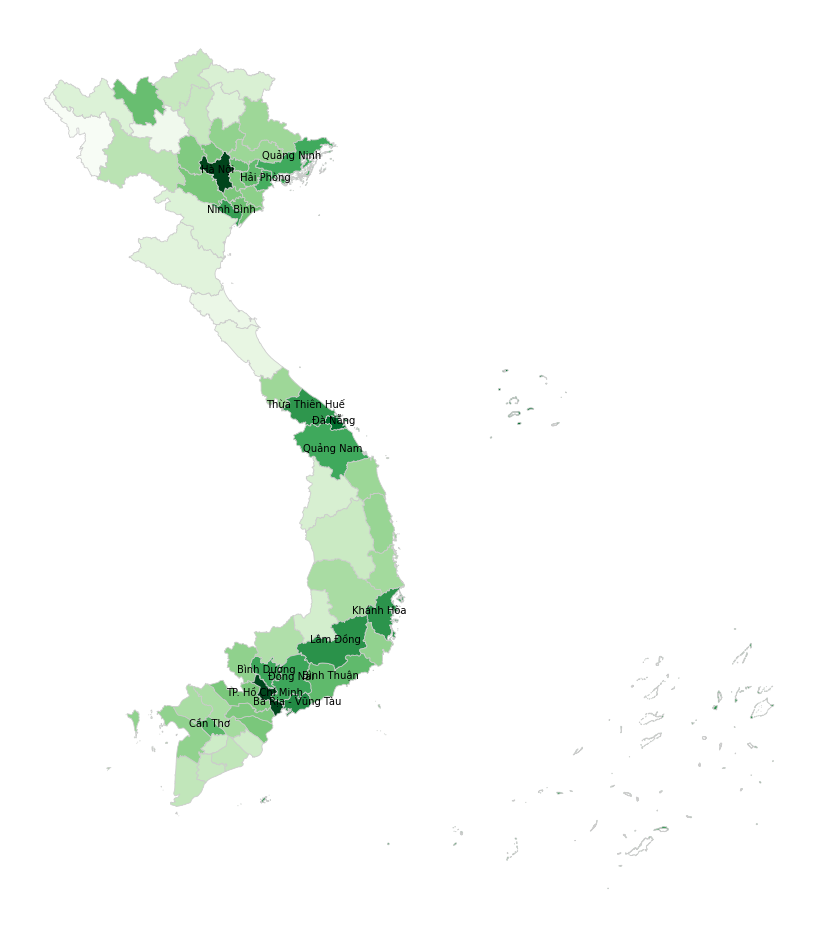

In [11]:
# set the value column that will be visualised
variable = 'Tourists'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.sort_values(by=['Tourists'], ascending=False)[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

In [12]:
# Weighted average to calculate the average rating
data['Rate*Visitors'] = data['Rate'] * data['Visitors']
df_rating = data.groupby(['Province']).sum()[['Visitors', 'Rate*Visitors']].reset_index()
df_rating['avg_rating'] = df_rating['Rate*Visitors']/df_rating['Visitors']
df_rating.head()

,Province,Visitors,Rate*Visitors,avg_rating
0,An Giang,4979,21344.6,4.286925
1,Bà Rịa - Vũng Tàu,14211,60889.7,4.284688
2,Bình Dương,3565,14954.2,4.194727
3,Bình Phước,462,1894.9,4.101515
4,Bình Thuận,7365,32111.2,4.359973


In [15]:
df_rating.sort_values(by=['avg_rating'])

,Province,Visitors,Rate*Visitors,avg_rating
20,Hưng Yên,487,1820.3,3.737782
31,Lạng Sơn,4011,15694.1,3.912765
11,Cao Bằng,343,1357.3,3.957143
48,Thái Nguyên,1160,4605.9,3.970603
8,Bắc Kạn,216,867.2,4.014815
...,...,...,...,...
56,Yên Bái,1193,5376.0,4.506287
39,Quảng Nam,12452,56206.5,4.513853
36,Phú Thọ,1485,6750.8,4.545993
33,Nghệ An,3572,16384.0,4.586786


In [ ]:
# merge map_df with avg_rating
merged = map_df.merge(df_rating, how='left', left_on="ten_tinh", right_on="Province")
merged.drop(columns=['Province'], inplace=True)
merged.head()

,gid,code,ten_tinh,geometry,Visitors,Rate*Visitors,avg_rating
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",4979,21344.6,4.286925
1,2,AD01,Bà Rịa - Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",14211,60889.7,4.284688
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",1063,4478.5,4.213076
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",216,867.2,4.014815
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",2749,11795.1,4.290688


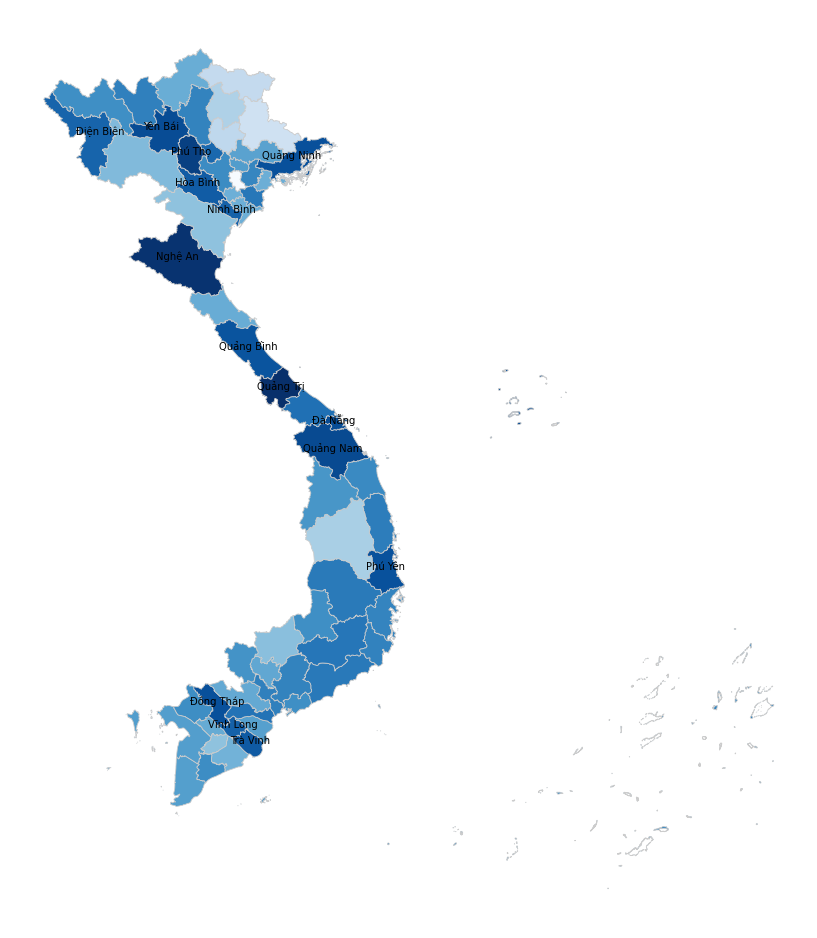

In [ ]:
# set the value column that will be visualised
variable = 'avg_rating'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.sort_values(by=['avg_rating'], ascending=False)[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

In [ ]:
merged.sort_values(by=['avg_rating'], ascending=False)[:15]

,gid,code,ten_tinh,geometry,Visitors,Rate*Visitors,avg_rating,coords
48,49,AD01,Quảng Trị,"MULTIPOLYGON (((107.07453 17.10850, 107.08320 ...",2655,12210.9,4.599209,"(106.95917927565137, 16.734465416000074)"
39,40,AD01,Nghệ An,"MULTIPOLYGON (((105.98788 18.79644, 105.98757 ...",3572,16384.0,4.586786,"(104.85813453805783, 19.27631577500004)"
42,43,AD01,Phú Thọ,"MULTIPOLYGON (((105.11401 21.70583, 105.11601 ...",1485,6750.8,4.545993,"(105.13420493245168, 21.320865605000083)"
45,46,AD01,Quảng Nam,"MULTIPOLYGON (((108.64510 15.47841, 108.64394 ...",12452,56206.5,4.513853,"(108.0013542379285, 15.510735171500032)"
62,63,AD01,Yên Bái,"MULTIPOLYGON (((104.60800 22.29097, 104.60906 ...",1193,5376.0,4.506287,"(104.51470039982314, 21.808477243000056)"
14,15,AD01,Đà Nẵng,"MULTIPOLYGON (((111.21578 15.77342, 111.20997 ...",22605,101776.7,4.502398,"(108.02160318372734, 16.068879979000084)"
19,20,AD01,Đồng Tháp,"MULTIPOLYGON (((105.44963 10.95591, 105.45154 ...",2624,11794.5,4.494855,"(105.65276746860965, 10.554335233500066)"
47,48,AD01,Quảng Ninh,"MULTIPOLYGON (((107.34549 20.68667, 107.34411 ...",12293,55218.0,4.491825,"(107.17046118090379, 21.237651995500073)"
43,44,AD01,Phú Yên,"MULTIPOLYGON (((109.39067 12.82696, 109.39037 ...",7248,32547.4,4.490535,"(109.07259307810524, 13.200231028000074)"
44,45,AD01,Quảng Bình,"MULTIPOLYGON (((106.46825 17.87229, 106.46750 ...",5537,24808.9,4.480567,"(106.2877828628645, 17.50708695350007)"


<Figure size 1440x720 with 0 Axes>

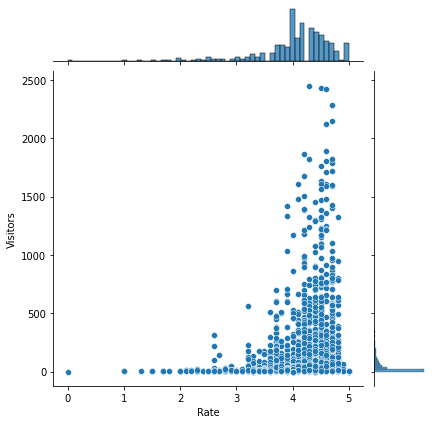

In [ ]:
# Joint plot
plt.figure(figsize=(20, 10))
sns.jointplot(data=data, y="Visitors", x="Rate")

In [ ]:
# Most visited destination of each province
top_destination = data.loc[data.groupby(['Province'])['Visitors'].idxmax()].reset_index(drop=True)[['Province', 'Destination', 'Rate', 'Visitors']]
top_destination.head()

,Province,Destination,Rate,Visitors
0,An Giang,Núi Sam - Miếu bà Chúa Xứ,4.5,806
1,Bà Rịa - Vũng Tàu,Bãi Trước,4.5,1468
2,Bình Dương,Khu du lịch Đại Nam,4.4,894
3,Bình Phước,Núi Bà Rá - Hồ Thác Mơ,4.2,143
4,Bình Thuận,Đồi cát bay,4.6,1213


In [ ]:
top_province = data[['Province', 'Tourists']].drop_duplicates()

In [ ]:
top_province.sort_values(by=['Tourists'], ascending=False).head()

,Province,Tourists
0,Hà Nội,143397
123,TP. Hồ Chí Minh,142570
197,Đà Nẵng,125420
276,Bà Rịa - Vũng Tàu,109567
329,Lâm Đồng,105266


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0.0, 5.0)

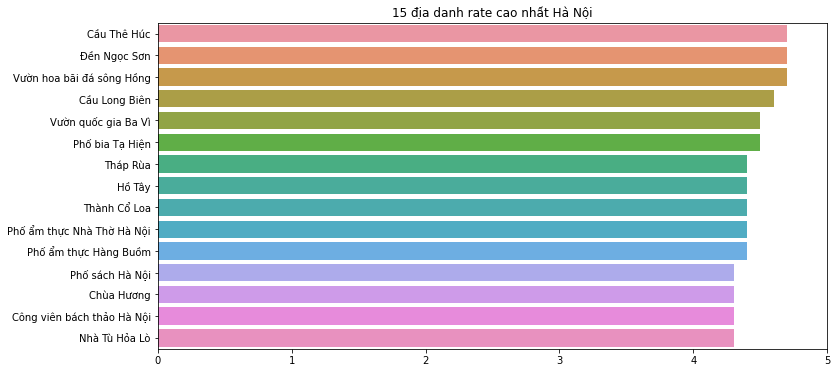

In [ ]:
plt.figure(figsize=(12, 6))
df_hanoi = data[data['Province'] == 'Hà Nội'][data['Visitors'] >= 200].sort_values(by=['Rate'], ascending=False)[['Destination', 'Rate']][:15]
ax = sns.barplot(x='Rate', y='Destination', data=df_hanoi)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('15 địa danh rate cao nhất Hà Nội')
ax.set_xlim(0, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0.0, 5.0)

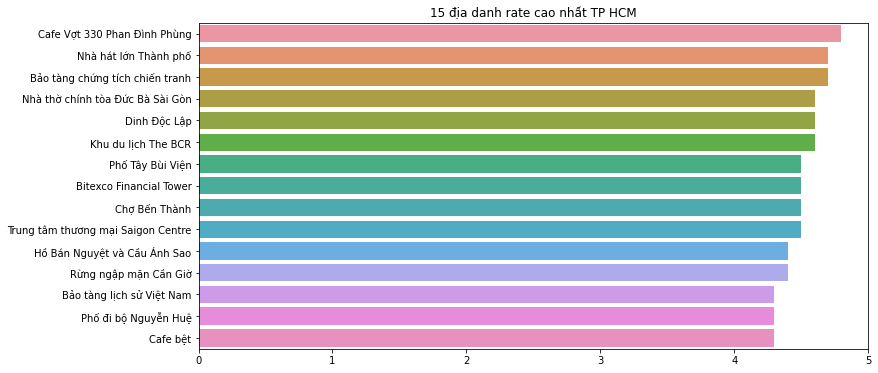

In [ ]:
plt.figure(figsize=(12, 6))
df_hcm = data[data['Province'] == 'TP. Hồ Chí Minh'][data['Visitors'] >= 200].sort_values(by=['Rate'], ascending=False)[['Destination', 'Rate']][:15]
ax = sns.barplot(x='Rate', y='Destination', data=df_hcm)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('15 địa danh rate cao nhất TP HCM')
ax.set_xlim(0, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0.0, 5.0)

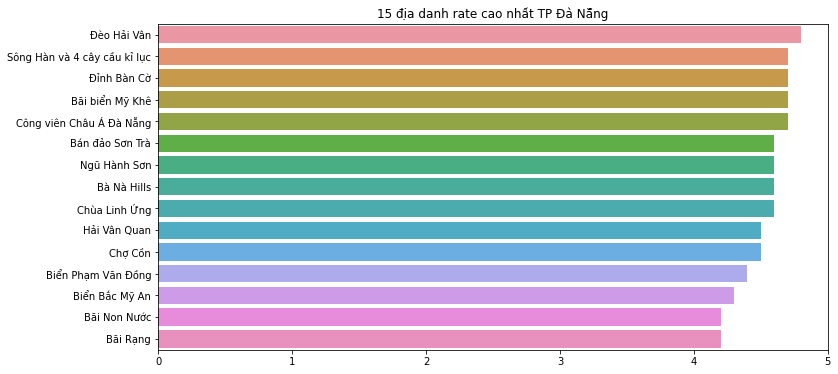

In [ ]:
plt.figure(figsize=(12, 6))
df_danang = data[data['Province'] == 'Đà Nẵng'][data['Visitors'] >= 200].sort_values(by=['Rate'], ascending=False)[['Destination', 'Rate']][:15]
ax = sns.barplot(x='Rate', y='Destination', data=df_danang)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('15 địa danh rate cao nhất TP Đà Nẵng')
ax.set_xlim(0, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0.0, 5.0)

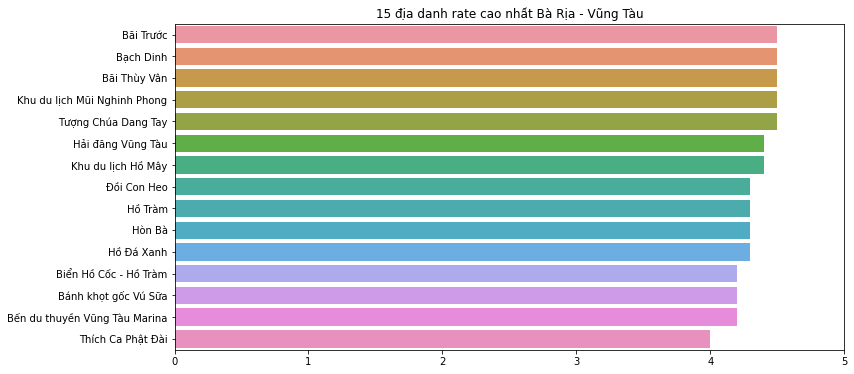

In [ ]:
plt.figure(figsize=(12, 6))
df_vungtau = data[data['Province'] == 'Bà Rịa - Vũng Tàu'][data['Visitors'] >= 200].sort_values(by=['Rate'], ascending=False)[['Destination', 'Rate']][:15]
ax = sns.barplot(x='Rate', y='Destination', data=df_vungtau)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('15 địa danh rate cao nhất Bà Rịa - Vũng Tàu')
ax.set_xlim(0, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0.0, 5.0)

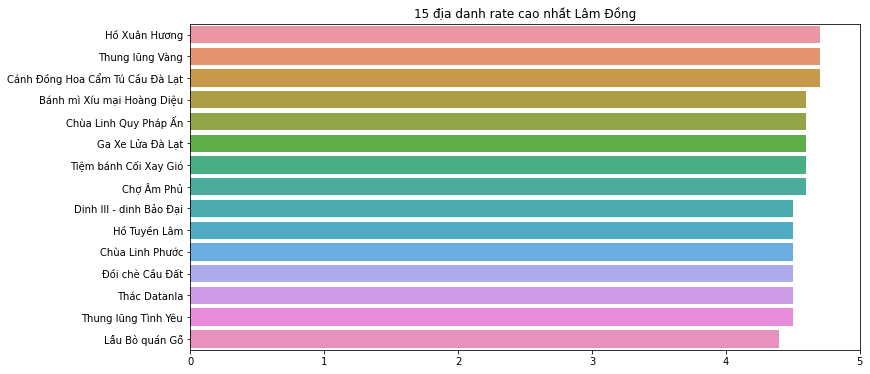

In [ ]:
plt.figure(figsize=(12, 6))
df_lamdong = data[data['Province'] == 'Lâm Đồng'][data['Visitors'] >= 200].sort_values(by=['Rate'], ascending=False)[['Destination', 'Rate']][:15]
ax = sns.barplot(x='Rate', y='Destination', data=df_lamdong)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('15 địa danh rate cao nhất Lâm Đồng')
ax.set_xlim(0, 5)